# Data Flow
## Here, we test the data flow of the data from the input to the output. We make our Dataset and Model and make sure the data is flowing correctly through the model. We also check the output of the model to make sure it is in the correct format.

In [73]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import time
import os
import hydra
import matplotlib.pyplot as plt
import monai
import einops

In [ ]:
# don't forget Hydra stuff!

In [11]:
#config = {'dataset': {}}
class Config():
    def __init__(self):
        dataset = {}
config = Config()
config.dataset = {
    #dataset = {
    'DATA_SRC': '/home/sasank.desaraju/med-start/data/chestmnist_64.npz',
    'SPLITS_DIR': '/home/sasank.desaraju/med-start/splits/',
    'SPLIT_NAME': 'my_split_64',
    #},
}

In [57]:
# Dataset

class ChestDataset(torch.utils.data.Dataset):
    def __init__(self, config, stage, transform=None):
        self.config = config
        self.stage = stage
        self.transform = transform
        # sself.data = []
        # self.labels = []

        self.data = pd.read_csv(os.path.join(self.config.dataset['SPLITS_DIR'], self.config.dataset['SPLIT_NAME'], self.stage + '_' + self.config.dataset['SPLIT_NAME'] + '.csv'))
        self.images = np.load(self.config.dataset['DATA_SRC'])[self.stage + '_images']
        self.labels = np.load(self.config.dataset['DATA_SRC'])[self.stage + '_labels']

        assert self.images[0].shape == (64, 64)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.images[self.data.iloc[idx]['image']]
        assert image.shape == (64, 64)
        label = self.labels[self.data.iloc[idx]['label']]
        if self.transform:
            image = self.transform(image)
        
        sample = {'image': image, 'label': label}

        return sample

In [58]:
dataset = ChestDataset(config, 'train')

78468


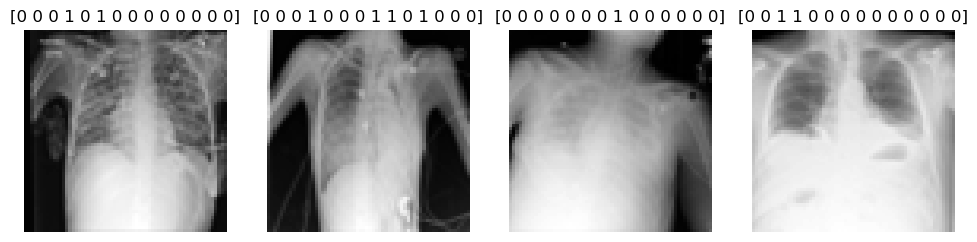

In [68]:
# iterate over the dataset
#for i in range(len(dataset)):
print(len(dataset))

# Show the image with label for the first 4 samples
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    sample = dataset[i+5]
    axs[i].imshow(sample['image'], cmap='gray')
    axs[i].set_title(sample['label'])
    axs[i].axis('off')

Okay, our dataset object can successfully load and return the data.
Now, let's check if the data is flowing correctly through the model.
We will create a simple model and pass the data through it to check the output.

In [ ]:
# We need to establish the dimensions of the input and output layers of the network
# This is done by examining the data
# The input layer will have 64 * 64 = 4096 neurons
# The output layer will have 14 neurons, one for each class
# The labels take values of either 0 or 1
# In order to get the output layer to produce values between 0 and 1, we will use the sigmoid activation function
# The loss function will be binary cross entropy
# The network will use a MONAI UNet architecture

In [76]:
import einops

net = monai.networks.nets.UNETR(
    in_channels=1,
    out_channels=14,
    spatial_dims=2,
    img_size=(64, 64),
)

input = torch.randn(1, 1, 64, 64)

output = net(input)

print(output.shape)

OptionalImportError: from einops.layers.torch import Rearrange (No module named 'einops').

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies